### Create confusion matrix

In [54]:
from os import listdir, makedirs
from os.path import isfile, join, exists
from os import listdir, makedirs
from brainpipe.system import study
import pandas as pd
import numpy as np
from itertools import product
bsl = 'None'
###############################################################################################
st = study('Olfacto')
path_df = join(st.path,'figure/0_Classif_Power_E_EpiPerf_LowHigh_'+bsl+'/Bilan_classif/')
path2save = join(path_df,'Matrices/')
###############################################################################################
if not exists(path2save):
    makedirs(path2save)
###############################################################################
freq = '6_gamma2'#['1_delta','2_theta','3_alpha','4_beta','5_gamma1','6_gamma2']#
win,min_sig = '1','6'
conds = ['low','high']

#Create the list of rois to create the global matrix
roi75 = np.array([])
filename = path_df+'Mai_Classif_'+conds[0]+'_'+conds[1]+'_'+freq+'_win'+win+'_patients'+min_sig+'.csv'
df75 = pd.read_csv(filename)
roi75 = np.hstack((roi75,df75['s_MAI_RL'].values)) if np.size(roi75) else df75['s_MAI_RL'].values
roi_all = np.unique(roi75)
roi_all = np.delete(roi_all,np.where(roi_all=='Not f'),axis=0)
roi_all = np.delete(roi_all,np.where(roi_all=='Not found'),axis=0)
print(roi_all.shape,roi_all)
#roi_all = np.delete(roi_all,[3,4])
#print(roi_all)

-> Olfacto loaded


FileNotFoundError: File b'/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/Olfacto/figure/0_Classif_Power_E_EpiPerf_LowHigh_None/Bilan_classif/Mai_Classif_low_high_6_gamma2_win1_patients6.csv' does not exist

### Create the ROI matrix // nb of patients

### FEATURE MATRIX
    Power, DA, Time

In [52]:
#Create the boolean matrix to show only regions sig in at least 60% of patients
da_mat, pow_mat, time_mat = np.array([]),np.array([]),np.array([])
x_freq, x_cond = [], []
feats = ['da','time','pow_change']
groupby = 'cond'


filename = path_df+'Mai_Classif_'+conds[0]+'_'+conds[1]+'_'+freq+'_win'+win+'_patients'+min_sig+'.csv'
sig60, data = pd.read_csv(filename), np.array([])
sig60['pow_change']= (sig60['p0']-sig60['p1'])/sig60['p1']
gr = sig60.groupby(['s_MAI_RL','su_codes'])
sel = gr[feats].agg(('max','min','mean'))
da, time, rel_change = np.array([]), np.array([]), np.array([])
for roi in roi_all:
    df_roi = sel[sel.index.get_level_values(0)==roi]
    da_val = df_roi.filter(like='da').filter(like='max').mean().values
    time_val = df_roi.filter(like='time').filter(like='mean').mean().values
    pow_min = df_roi.filter(like='pow_change').filter(like='min').mean().values
    pow_max = df_roi.filter(like='pow_change').filter(like='max').mean().values
    rel_change_val = []
    if abs(pow_min[0])>abs(pow_max[0]):
        rel_change_val = pow_min
    elif abs(pow_min[0])<abs(pow_max[0]):
        rel_change_val = pow_max
    elif abs(pow_min[0])==abs(pow_max[0]):
        rel_change_val = pow_max
    elif np.isnan(pow_min):
        rel_change_val = [np.nan]
    #print('value for',roi,pow_min, pow_max,rel_change_val, da_val, time_val)

    da = np.hstack((da,da_val)) if np.size(da) else da_val
    time = np.hstack((time,time_val)) if np.size(time) else time_val
    rel_change = np.hstack((rel_change,rel_change_val)) if np.size(rel_change) else rel_change_val
    #print('vector',len(da),len(time),len(rel_change))
da_mat = np.vstack((da_mat,da)) if np.size(da_mat) else da
time_mat = np.vstack((time_mat,time)) if np.size(time_mat) else time
pow_mat = np.vstack((pow_mat,rel_change)) if np.size(pow_mat) else rel_change
da_mat,time_mat, pow_mat = da_mat[:,np.newaxis], time_mat[:,np.newaxis], pow_mat[:,np.newaxis]
_, idx = np.unique(x_cond,return_index=True) #to keep order
x_cond = [x_cond[i] for i in sorted(idx)]
print(da_mat.shape, time_mat.shape, pow_mat.shape)

(8, 1) (8, 1) (8, 1)


### Plot the confusion matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 8
0 [] mean [[ 0.88161111]
 [ 0.84459913]
 [ 0.88057619]
 [ 0.90570833]
 [ 0.8469316 ]
 [ 0.90685714]
 [ 0.95579365]
 [ 0.87132846]] 0.886675703463
<matplotlib.colors.LinearSegmentedColormap object at 0x7f43194c0b38> 1
Confusion matrix, without normalization


/media/karim/Datas4To/1_Analyses_Intra_EM_Odor/3_BrainpipeScripts/1_Intra_scripts/confusion_matrix.py:22: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax1.set_axis_bgcolor("silver")


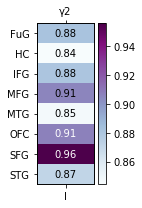

1 8
0 [] mean [[ 2.00976562]
 [ 1.91513672]
 [ 1.57729492]
 [ 1.45420619]
 [ 1.96029297]
 [ 1.91480469]
 [ 1.66728154]
 [ 2.44763184]] 1.86830181142
<matplotlib.colors.LinearSegmentedColormap object at 0x7f4319464b00> 1
Confusion matrix, without normalization


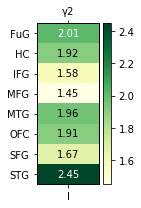

2 8
0 [] mean [[ 0.24215345]
 [-0.13536178]
 [-0.14331441]
 [-0.15247172]
 [ 0.23829582]
 [-0.25689471]
 [ 0.41767444]
 [ 0.4039896 ]] 0.0767588357712
<matplotlib.colors.LinearSegmentedColormap object at 0x7f43194649e8> 2
Confusion matrix, without normalization
min,max -0.256894711756 0.417674442091
0.339255138487 -0.148808798986


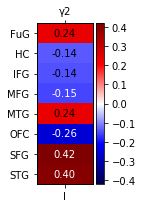

In [53]:
import matplotlib.pyplot as plt
from confusion_matrix import plot_confusion_matrix
%load_ext autoreload
%autoreload 2

freqnames = ['γ2']#,'θ','γ2']
codes = {0:['da',plt.cm.BuPu,1],
         1:['time',plt.cm.YlGn,1],
         2:['pow_change',plt.cm.seismic,2]}
feats_mat = [da_mat, time_mat, pow_mat]
option = '75'
# Plot non-normalized confusion matrix
for i,mat in enumerate(feats_mat):
    print(i, len(mat))
    groups = len(np.unique(x_cond))
    print(groups, x_cond,'mean',mat,np.nanmean(mat))
    nconds = len(np.unique(x_cond))
    print(codes[i][1],codes[i][2])
    plot_confusion_matrix(mat, xtickslabels1=freqnames, xtickslabels2='low_high', 
        ytickslabels=roi_all,cmap=codes[i][1], ylabel='Regions',size=(2,3),cbsides=codes[i][2])
    plot_name = path2save+'Matrix_recap_'+freqnames[0]+'_'+codes[i][0]+'_win'+win+'_min'+min_sig+'.png'
    plt.savefig(plot_name, dpi=600, bbox_inches='tight')
    plt.show()